In [1]:
%%bash
pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Constants
_RANDOM_STATE = 42

In [4]:
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(data, columns=feature_names)
df['Target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Check for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [7]:
# Display basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


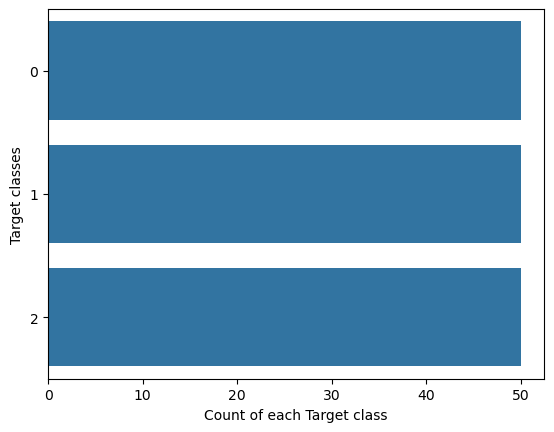

In [8]:
# plot the count of each value in df
sns.countplot(y=df.Target ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

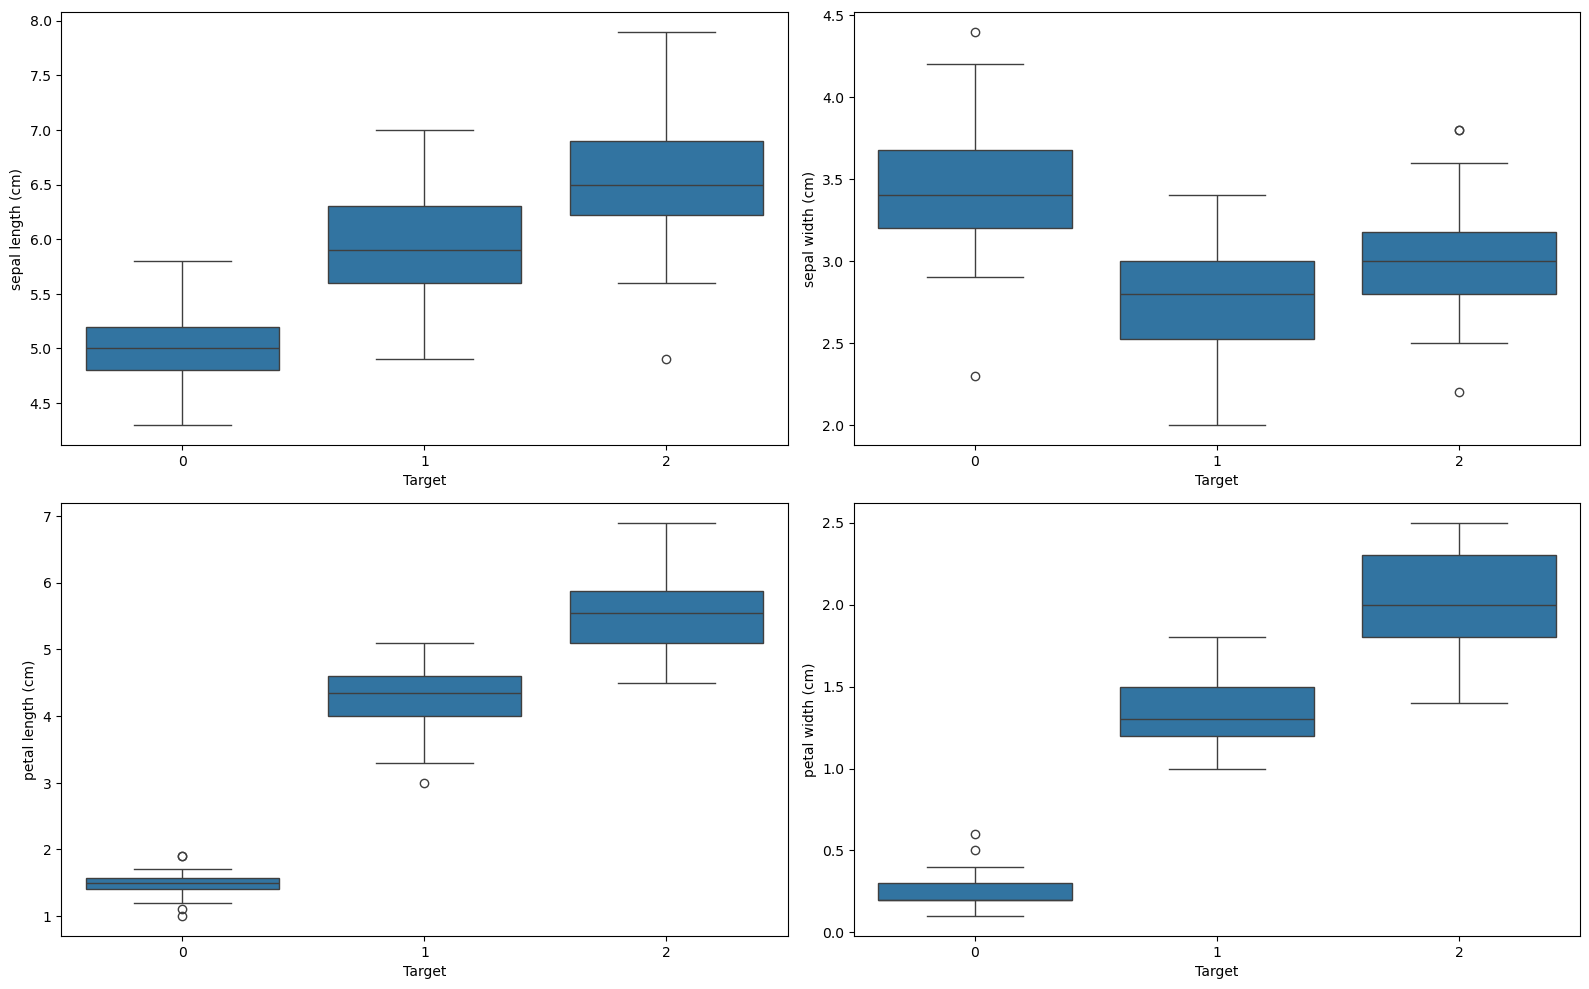

In [9]:
# plot a box plot for each column (Y-axis) - target (X-axis)
# you can choose to create 4 subplots or have four separate plots
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Target'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

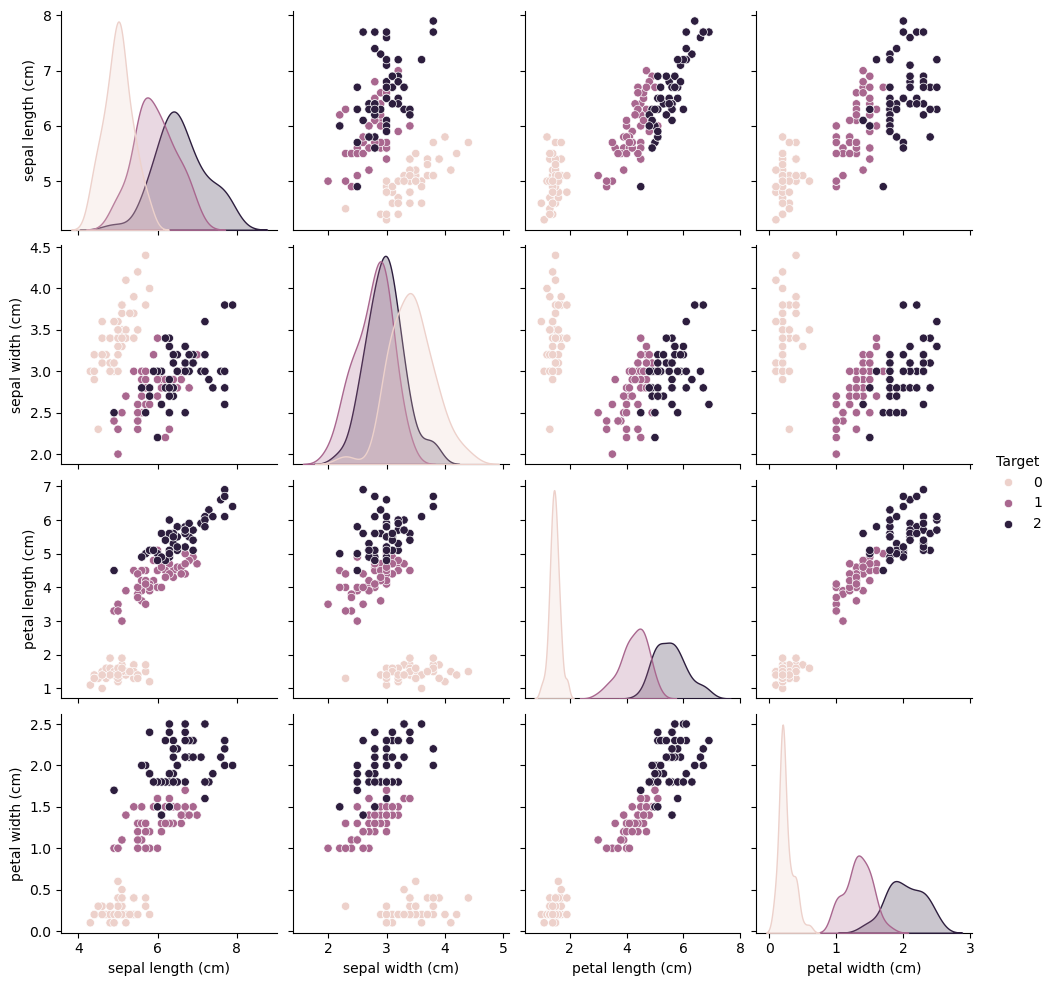

In [10]:
# create a pair plot and define the color as the target
p=sns.pairplot(df, hue = 'Target')

In [11]:
# scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

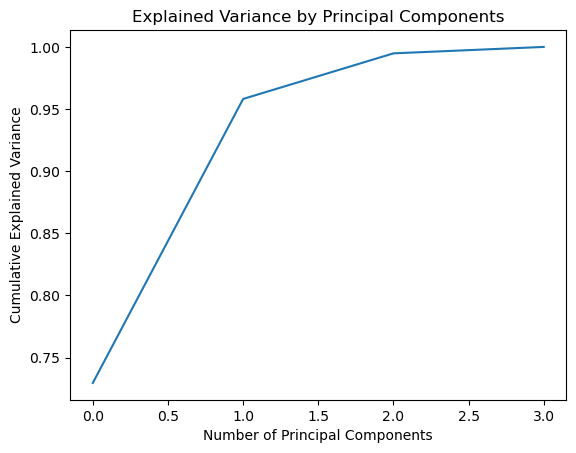

In [12]:
# Instantiate the PCA model
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [13]:
# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])
pca_df

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


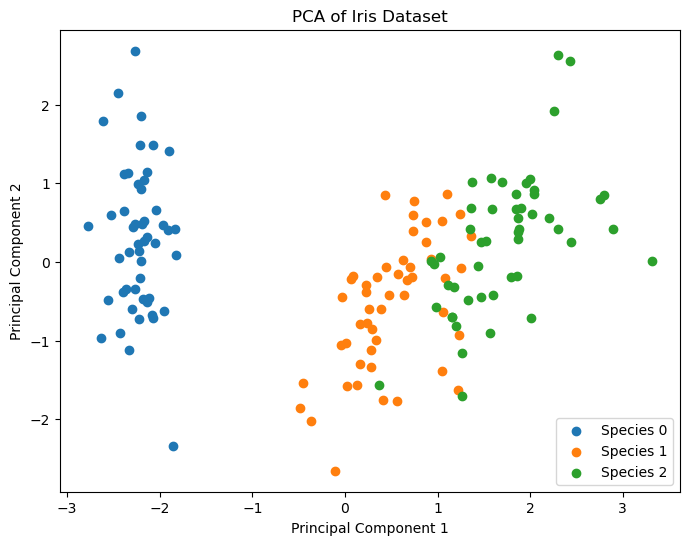

In [14]:
# Add the target column to the PCA DataFrame
pca_df['Target'] = target

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for species in range(3):
    plt.scatter(
        pca_df.loc[pca_df['Target'] == species, 'PC1'],
        pca_df.loc[pca_df['Target'] == species, 'PC2'],
        label=f'Species {species}'
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [15]:
X_train, X_test, y_train, y_test = train_test_split(pca_df.iloc[:, :-1], pca_df['Target'].values, test_size = 0.3, random_state=20, stratify=pca_df['Target'].values)

In [16]:
X_train

,PC1,PC2,PC3,PC4
42,-2.553638,-0.479101,0.305766,0.066601
16,-2.207588,1.483609,-0.005344,-0.188817
49,-2.203833,0.009216,-0.153029,-0.049372
94,0.288586,-0.855730,0.130890,0.107402
41,-1.858122,-2.337415,-0.204234,-0.289864
...,...,...,...,...
99,0.256731,-0.598852,0.091879,0.058622
30,-2.140122,-0.504541,-0.075008,0.048189
2,-2.364229,-0.341908,0.044201,-0.028377
130,2.435954,0.259284,-0.727816,0.017923


Optimal k: 3


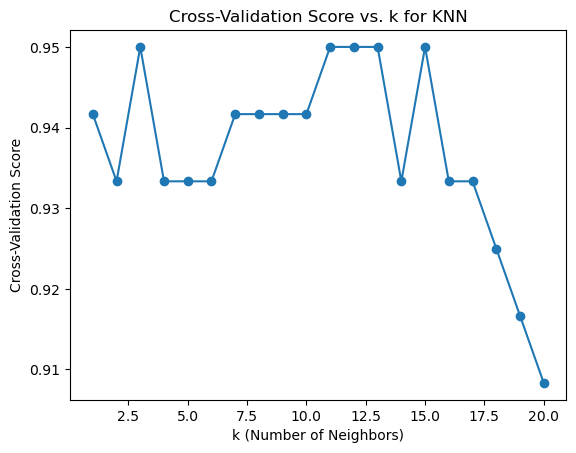

Test Accuracy with k=3: 1.0


In [17]:
# Extract features and target
X = pca_df.drop('Target', axis=1)
y = pca_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to try
k_values = list(range(1, 21))

# Create an empty list to store cross-validation scores for each k
cv_scores = []

# Perform k-fold cross-validation for each k
for k in k_values:
    # Create a pipeline with PCA and KNN
    model = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)  # You can adjust the number of folds (cv) as needed

    # Average cross-validation scores for this k
    cv_scores.append(np.mean(scores))

# Find the optimal k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')

# Plot the cross-validation scores for different k values
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. k for KNN')
plt.show()

# Train the final model with the optimal k using the entire training set
final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = final_model.score(X_test, y_test)
print(f'Test Accuracy with k={optimal_k}: {test_accuracy}')


# Your Turn

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets['class']


# EDA

In [19]:
X.shape

(366, 34)

In [20]:
# TODO: Let's see the head of X


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [21]:
# Do any of the columns have missing values?


True

In [22]:
# TODO: Any missing values in target vector, y?


False

<Axes: xlabel='count', ylabel='class'>

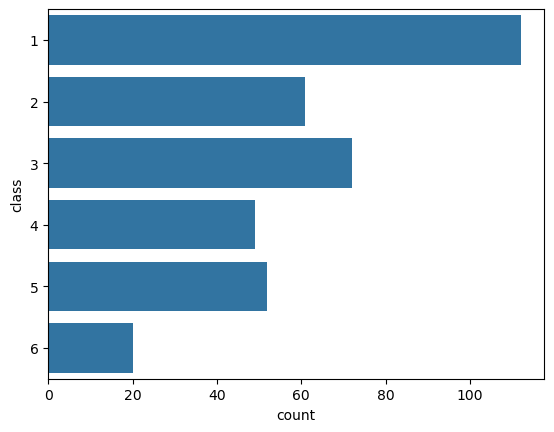

In [23]:
# Visualize distribution of target labels using a count plot


In [24]:
# TODO: Reflection: Is this a balanced dataset?

# Preprocessing

In [25]:
# TODO: Split data into train, test with 20% holdout



In [27]:
# Copy X_train to a new var X_eda
X_eda = X_train.copy(deep=True)

In [28]:
# TODO: instantiate a SimpleImputer and fit_transform X_eda
# NOTE: Use set_output API to maintain dataframe type
# TODO: print out X_eda.isna().any().any()
from sklearn.impute import SimpleImputer


False

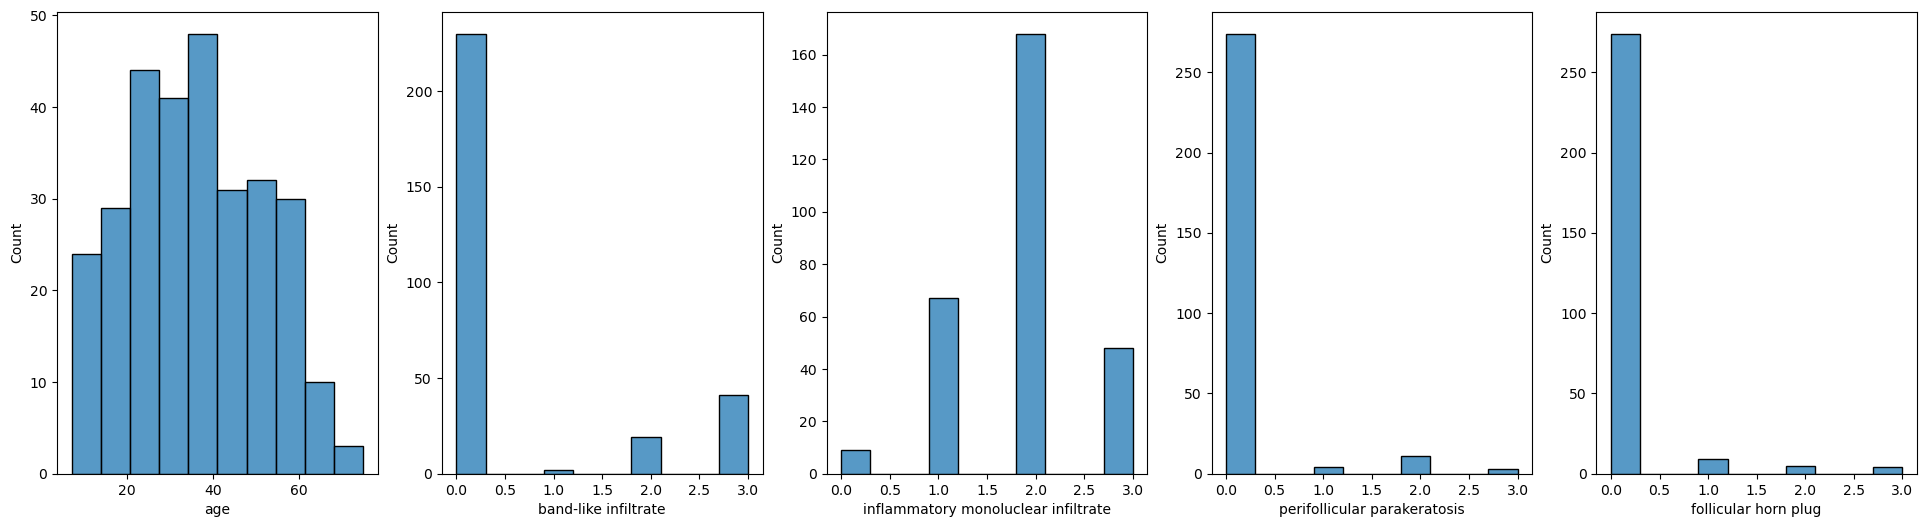

In [29]:
# TODO: For last 5 features, plot a histplot to visualize feature distribution

def plot_last_5_features(X: pd.DataFrame) -> None:
    """Plots subplot histograms of last five features of X on a single figure

    Args:
        X (pd.DataFrame): Dataframe to plot
    """
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(24,6))
    # TODO: You complete the function

plot_last_5_features(X_eda)

In [30]:
# TODO: Scale all features in X_eda using StandardScaler
from sklearn.preprocessing import StandardScaler


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
341,-1.611351,-1.146532,-1.700434,0.533677,-0.705526,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,-0.892057,-0.485409,-0.230939,-0.243414,0.179007,-0.505551,2.111983
202,-0.083707,0.278095,-1.700434,0.533677,-0.705526,-0.483707,1.375587,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,-0.892057,-0.485409,-0.230939,-0.243414,1.591714,-0.505551,1.062391
75,1.443938,0.278095,-0.606763,0.533677,-0.705526,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,0.879920,-0.485409,-0.230939,-0.243414,0.179007,-0.505551,-0.708794
84,-1.611351,-1.146532,0.486908,1.404257,-0.705526,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,-0.892057,-0.485409,-0.230939,-0.243414,-1.233699,-0.505551,1.259190
354,-0.083707,-2.571160,-0.606763,0.533677,-0.705526,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,-0.892057,-0.485409,-0.230939,-0.243414,0.179007,-0.505551,1.324789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.083707,-1.146532,0.486908,-1.207482,-0.705526,-0.483707,4.736852,-0.461979,2.500404,-0.556455,...,-0.471114,-0.523770,-0.485566,-0.892057,-0.485409,6.294937,5.848887,-2.646406,-0.505551,-1.495988
106,-1.611351,-1.146532,-1.700434,-0.336902,0.378756,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,-0.523770,-0.485566,0.879920,-0.485409,-0.230939,-0.243414,0.179007,-0.505551,1.587187
270,-0.083707,0.278095,-0.606763,-1.207482,0.378756,-0.483707,-0.305046,-0.461979,-0.602080,-0.556455,...,-0.471114,0.643717,-0.485566,1.765908,-0.485409,-0.230939,-0.243414,0.179007,-0.505551,1.718386
348,1.443938,0.278095,0.486908,-1.207482,-0.705526,-0.483707,4.736852,-0.461979,0.432081,-0.556455,...,-0.471114,-0.523770,-0.485566,0.879920,-0.485409,6.294937,3.818120,0.179007,-0.505551,-1.692786


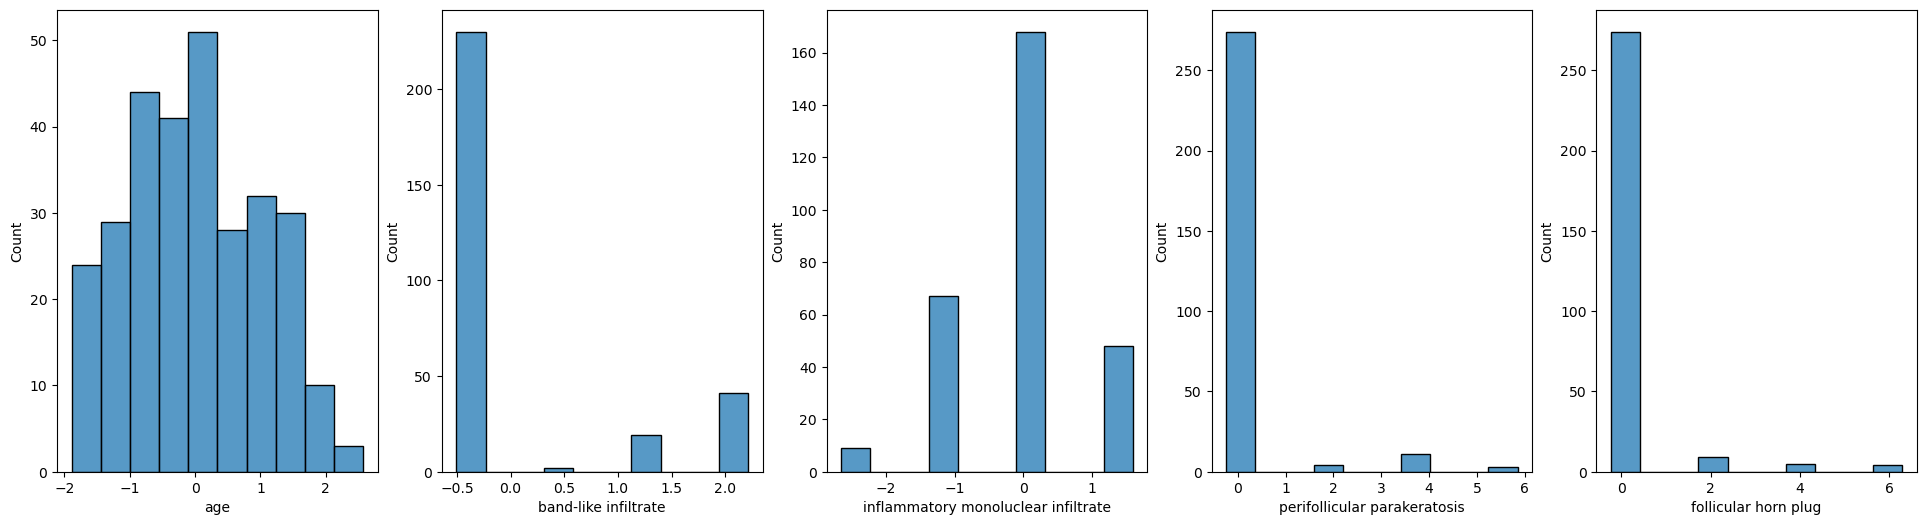

In [31]:
# TODO: Call above histogram function again to see what happened to our vars:


# Dimensionality Reduction

In [32]:
# Let's reduce the dimensionality of our dataset! 
# TODO: Instantiate a PCA with the number of components required to explain 90% of the variance in the X_eda
# NOTE: Use set_output API to ensure X_eda is returned as dataframe instead of np.array
# TODO: Call fit_transform on X_eda and 


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16
341,-0.461242,-2.045846,-2.628620,3.277124,0.847620,-0.594042,-0.671382,0.234307,0.546292,0.385499,-0.904493,-0.662100,-0.441417,1.669831,0.444192,0.079960,-0.499149
202,-0.398531,-2.098640,-1.132167,1.952294,1.243778,-0.439400,-0.307959,-0.757705,-0.889883,1.493686,-1.432656,0.443537,-0.014089,0.944717,-0.312875,0.009058,0.438546
75,-0.069213,-1.690695,-0.466030,-2.469069,0.304967,0.430478,-0.041851,0.004066,-0.780722,-0.859988,-0.876899,-0.460060,-1.678494,-0.274479,-0.212485,0.622244,0.096175
84,0.083573,-2.156847,-1.820885,2.757411,-0.955568,0.698051,0.840026,0.704377,0.040643,0.241488,-1.000407,-0.125243,-0.745969,1.245083,-0.259302,-0.564849,-0.514635
354,-0.089853,-2.232410,-2.322505,3.000250,0.591804,-0.810553,-0.676395,0.136951,0.184517,-0.118003,-1.432700,0.547323,0.228033,0.744977,0.146246,1.346493,-0.738413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.548349,-3.743303,9.055656,1.839265,0.025694,0.656315,-0.441823,2.035937,1.037986,0.061392,1.661618,1.280033,-0.406331,1.706050,-1.293000,1.012142,-0.504228
106,0.582689,-2.638890,-1.355738,-0.446726,-2.346120,-0.622490,-1.323842,0.236858,0.889079,1.156411,-0.452950,-0.896501,-1.033046,0.582901,0.699542,-0.337580,-0.602642
270,0.434519,-1.783985,-1.191231,-1.535641,-0.562523,-2.062036,0.001375,0.087673,0.716398,1.132910,0.443825,-0.207750,1.066298,0.857227,-0.366281,0.202656,-0.182141
348,-1.205369,-3.281707,8.499944,0.407309,1.908462,-0.996004,0.645535,-0.494414,-0.012635,0.573002,-0.085034,0.407825,1.444084,1.037558,0.330706,0.995165,0.067436


In [33]:
# TODO: Reflect: How many features do we now have? Did we reduce the dimensionality of the dataset?

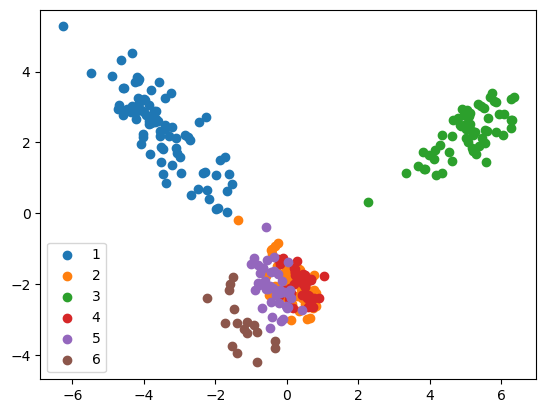

In [34]:
# TODO: Visualize first two PCA components of X_eda on a scatter plot independently for each unique label found in y_train

# Modelling

In [35]:
# Instantiate a random forest classifier with default values other than random_state set to _RANDOM_STATE
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=_RANDOM_STATE)

In [36]:
# Create a pipeline with our SimpleImputer, StandardScaler, PCA, and rf

from sklearn.pipeline import make_pipeline
steps = [si, ss, pca, rf]
pipe = make_pipeline(*steps)

Optimal number of components: 8


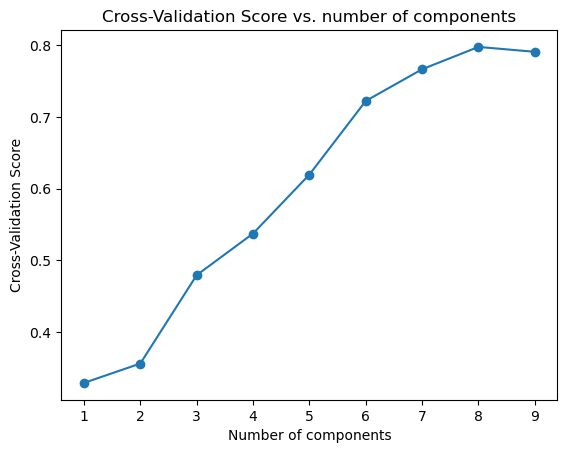

In [37]:
# TODO: Let's test our pipeline using different numbers of principal components similar to above
# NOTE: Recall that you can slice dataframes as follow: df.iloc[:, :i] will select all rows and all columns up to column number i

# Define a range of pca components to try
components = list(range(1, 10))
cv_scores = []

# Perform k-fold cross-validation for each number of components
for c in components:
    # Perform cross-validation

    # Average cross-validation scores for this number of components

# Find the optimal k with the highest cross-validation score

print(f'Optimal number of components: {optimal_comp}')

# Plot the cross-validation scores for different k values
plt.plot(components, cv_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs. number of components')
plt.show()


In [38]:
# Train the final model with the optimal number of components using the entire training set
pipe.fit(X_train.iloc[:, :optimal_comp], y_train)

# TODO: Evaluate the model on the test set

print(f'Test Accuracy with num comps == {optimal_comp}: {test_accuracy}')

Test Accuracy with num comps == 8: 0.7162162162162162
